In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [80]:
class Perceptron:
    def __init__(self ,eta: float=None ,epochs : int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if  training:
            print(f"intial weights before training : {self.weights}")
            
        self.eta = eta
        self.epochs = epochs
            
    # function starting with _ cant be access outside of class
    def _z_output(self , inputs, weights):
        return np.dot(inputs ,weights)
        
    
    def activation_function(self ,z):
        # activation finction will give 1 if z > 0 else 0
        return np.where(z >0 , 1, 0)
    
    def fit(self ,X ,y):
        self.X = X
        self.y = y
        
        # we are concatenating X with bias
        X_with_bias = np.c_[self.X ,-np.ones((len(self.X) ,1))]
        print(f"X with bias:\n {X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >>{epoch}")
            print("--"*10)
            
            z = self._z_output(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted value after forward pass :\n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"Error : \n{self.error}")
            
            # updating the weights
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T ,self.error)
            print(f"updated weights after epoch :{epoch +1 }/{self.epochs} : \n {self.weights}")
            print("##"*10)
    
    def predict(self ,X ):
        X_with_bias = np.c_[X ,-np.ones((len(X) ,1))]
        z = self._z_output(X_with_bias ,self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss : {total_loss}\n")
        return total_loss
        
    def _create_dir_return_path(self ,path ,filename):
        os.makedirs(path ,exist_ok = True)
        return os.path.join(path ,filename)
    
    def save(self ,filename ,path = None):
        if path is not None:
            model_file_Path = self._create_dir_return_path(path ,filename)
            joblib.dump(self ,model_file_Path)
        else:
            model_file_Path = self._create_dir_return_path("model" ,filename)
            joblib.dump(self ,model_file_Path)  
            
    def load(self ,filepath):
        return joblib.load(filepath)
        

In [81]:
def prepare_data(df ,target = "y"):
    X = df.drop(target ,axis = 1)
    y = df[target]
    
    return X ,y

In [82]:
AND = {
    "x1" :[0,0,1,1],
    "x2" : [0,1,0,1],
    "y" :[0,0 ,0 ,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [83]:
X ,y = prepare_data(df_AND)
# ETA = learning rate
ETA = 0.1
EPOCHS = 10
model_and = Perceptron(eta = ETA , epochs=EPOCHS)
model_and.fit(X,y)

# _ is just dumy variable
_ = model_and.total_loss()

intial weights before training : [-1.92460240e-05 -1.16624592e-04 -1.26648405e-04]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >>0
--------------------
Predicted value after forward pass :
[1 1 1 0]
Error : 
0   -1
1   -1
2   -1
3    1
Name: y, dtype: int64
updated weights after epoch :1/10 : 
 [-1.92460240e-05 -1.16624592e-04  1.99873352e-01]
####################
--------------------
for epoch >>1
--------------------
Predicted value after forward pass :
[0 0 0 0]
Error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch :2/10 : 
 [0.09998075 0.09988338 0.09987335]
####################
--------------------
for epoch >>2
--------------------
Predicted value after forward pass :
[0 1 1 1]
Error : 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch :3/10 : 
 [-1.92460240e-05 -1.16624592e-04  2.99873352e-01]
####################
--------------------
for epoch >>3
---------

In [84]:
model_and.save(filename="and.model")

In [85]:
reload_and = Perceptron().load(filepath="./model/and.model")

In [86]:
reload_and.predict(X=[[1,1]])

array([1])

In [87]:
OR = {
    "x1" :[0,0,1,1],
    "x2" : [0,1,0,1],
    "y" :[0,1 ,1 ,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [88]:
X ,y = prepare_data(df_OR)
# ETA = learning rate
ETA = 0.1
EPOCHS = 10
model_or = Perceptron(eta = ETA , epochs=EPOCHS)
model_or.fit(X,y)

# _ is just dumy variable
_ = model_or.total_loss()

intial weights before training : [ 8.07466574e-05  9.87965620e-05 -6.54003527e-05]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >>0
--------------------
Predicted value after forward pass :
[1 1 1 1]
Error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch :1/10 : 
 [8.07466574e-05 9.87965620e-05 9.99345996e-02]
####################
--------------------
for epoch >>1
--------------------
Predicted value after forward pass :
[0 0 0 0]
Error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch :2/10 : 
 [ 0.20008075  0.2000988  -0.2000654 ]
####################
--------------------
for epoch >>2
--------------------
Predicted value after forward pass :
[1 1 1 1]
Error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch :3/10 : 
 [ 0.20008075  0.2000988  -0.1000654 ]
####################
--------------------
for epoch >>3
--------------------


In [89]:
XOR = {
    "x1" :[0,0,1,1],
    "x2" : [0,1,0,1],
    "y" :[0,1 ,1 ,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [90]:
X ,y = prepare_data(df_XOR)
# ETA = learning rate
ETA = 0.1
EPOCHS = 10
model_xor = Perceptron(eta = ETA , epochs=EPOCHS)
model_xor.fit(X,y)

# _ is just dumy variable
_ = model_xor.total_loss()

intial weights before training : [-1.95219262e-04 -8.57457114e-05  1.61804508e-04]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >>0
--------------------
Predicted value after forward pass :
[0 0 0 0]
Error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch :1/10 : 
 [ 0.09980478  0.09991425 -0.1998382 ]
####################
--------------------
for epoch >>1
--------------------
Predicted value after forward pass :
[1 1 1 1]
Error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch :2/10 : 
 [-1.95219262e-04 -8.57457114e-05  1.61804508e-04]
####################
--------------------
for epoch >>2
--------------------
Predicted value after forward pass :
[0 0 0 0]
Error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch :3/10 : 
 [ 0.09980478  0.09991425 -0.1998382 ]
####################
--------------------
for epoch >>3
------------------

In [91]:
def save_plot(df ,model ,filename = "plot.png" , plot_dir = 'plots'):
    def _create_base_plot(df):
        df.plot(kind = "scatter" ,x ="x1" ,y = "x2" ,c ="y" ,s = 100 ,cmap = "coolwarm")
        plt.axhline(y=0 , color = "black" ,linestyle = '--' ,linewidth = 1)
        plt.axvline(x=0 , color = "black" ,linestyle = '--' ,linewidth = 1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    
    def _plot_decision_regions(X ,y, classifier ,resolution = 0.02):
        colors = ("cyan" ,"lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[: ,0]
        x2 = X[: ,1]
        
        x1_min ,x1_max = x1.min() - 1 ,x1.max() + 1
        x2_min ,x2_max = x2.min() - 1 ,x2.max() + 1
        
        xx1 ,xx2 = np.meshgrid(np.arange(x1_min ,x1_max ,resolution) ,
                              np.arange(x2_min ,x2_max ,resolution) )
        
        y_hat = classifier.predict(np.array([xx1.ravel() ,xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1 ,xx2 ,y_hat ,alpha = 0.3 ,cmap = cmap)
        plt.xlim(xx1.min() , xx1.max())
        plt.ylim(xx2.min() , xx2.max())
        
        plt.plot()
        
    X,y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X ,y ,model)
    
    os.makedirs(plot_dir ,exist_ok=True)
    plot_path = os.path.join(plot_dir ,filename)
    plt.savefig(plot_path)

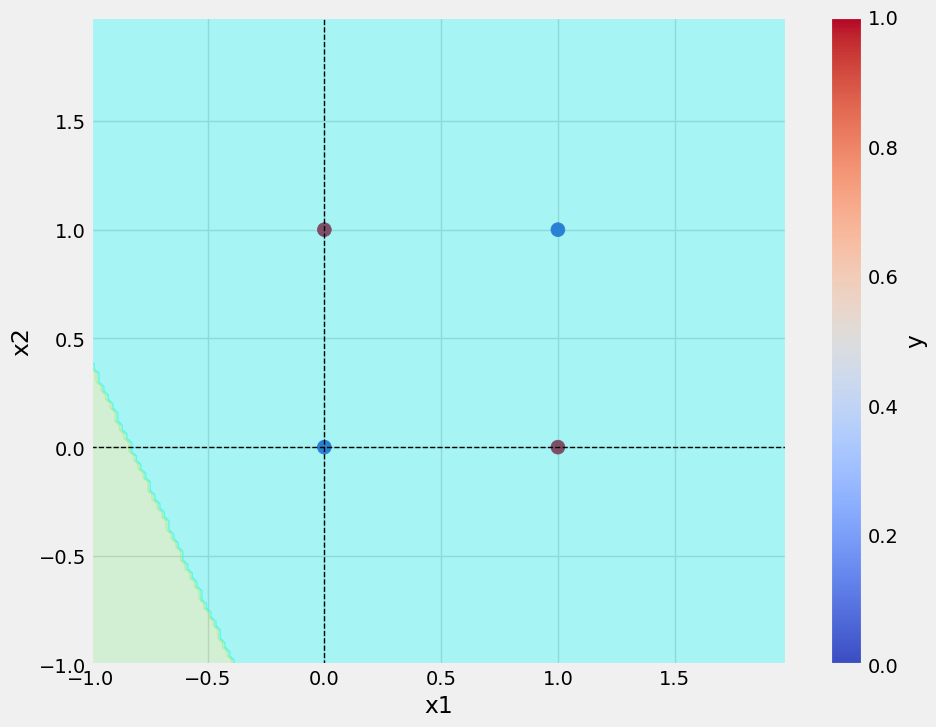

In [92]:
save_plot(df_XOR ,model_xor ,filename = "plot.png" )